In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline


In [32]:
df = pd.read_csv('C:/Users/71477/OneDrive - PT. Federal International Finance/External Class Training/Data Analytics/SuperStore_Orders.csv/SuperStore_Orders.csv',encoding='latin1')
df.head()

,order_id,order_date,ship_date,ship_mode,customer_name,segment,state,country,market,region,...,category,sub_category,product_name,sales,quantity,discount,profit,shipping_cost,order_priority,year
0,AG-2011-2040,01-01-2011,06-01-2011,Standard Class,Toby Braunhardt,Consumer,Constantine,Algeria,Africa,Africa,...,Office Supplies,Storage,"Tenex Lockers, Blue",408,2,0.0,106.140,35.46,Medium,2011
1,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Office Supplies,Supplies,"Acme Trimmer, High Speed",120,3,0.1,36.036,9.72,Medium,2011
2,HU-2011-1220,01-01-2011,05-01-2011,Second Class,Annie Thurman,Consumer,Budapest,Hungary,EMEA,EMEA,...,Office Supplies,Storage,"Tenex Box, Single Width",66,4,0.0,29.640,8.17,High,2011
3,IT-2011-3647632,01-01-2011,05-01-2011,Second Class,Eugene Moren,Home Office,Stockholm,Sweden,EU,North,...,Office Supplies,Paper,"Enermax Note Cards, Premium",45,3,0.5,-26.055,4.82,High,2011
4,IN-2011-47883,01-01-2011,08-01-2011,Standard Class,Joseph Holt,Consumer,New South Wales,Australia,APAC,Oceania,...,Furniture,Furnishings,"Eldon Light Bulb, Duo Pack",114,5,0.1,37.770,4.70,Medium,2011


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   order_id        51290 non-null  object 
 1   order_date      51290 non-null  object 
 2   ship_date       51290 non-null  object 
 3   ship_mode       51290 non-null  object 
 4   customer_name   51290 non-null  object 
 5   segment         51290 non-null  object 
 6   state           51290 non-null  object 
 7   country         51290 non-null  object 
 8   market          51290 non-null  object 
 9   region          51290 non-null  object 
 10  product_id      51290 non-null  object 
 11  category        51290 non-null  object 
 12  sub_category    51290 non-null  object 
 13  product_name    51290 non-null  object 
 14  sales           51290 non-null  object 
 15  quantity        51290 non-null  int64  
 16  discount        51290 non-null  float64
 17  profit          51290 non-null 

In [4]:
# Hapus tanda koma jika ada dan ubah ke numeric
df['sales'] = df['sales'].astype(str).str.replace(',', '', regex=False)
df['sales'] = pd.to_numeric(df['sales'], errors='coerce').fillna(0).astype(int)
print(df['sales'].head())
print(df['sales'].dtypes)


0    408
1    120
2     66
3     45
4    114
Name: sales, dtype: int64
int64


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   order_id        51290 non-null  object        
 1   order_date      51290 non-null  datetime64[ns]
 2   ship_date       51290 non-null  object        
 3   ship_mode       51290 non-null  object        
 4   customer_name   51290 non-null  object        
 5   segment         51290 non-null  object        
 6   state           51290 non-null  object        
 7   country         51290 non-null  object        
 8   market          51290 non-null  object        
 9   region          51290 non-null  object        
 10  product_id      51290 non-null  object        
 11  category        51290 non-null  object        
 12  sub_category    51290 non-null  object        
 13  product_name    51290 non-null  object        
 14  sales           51290 non-null  int64         
 15  qu

In [5]:
# Hitung total profit dan quantity per produk
product_summary = df.groupby('product_name').agg({
    'profit': 'sum',
    'quantity': 'sum',
    'sales': 'sum'
}).reset_index()

# Hitung margin: profit dibagi sales
product_summary['margin_ratio'] = product_summary['profit'] / product_summary['sales']

# Urutkan produk dengan margin rendah tapi quantity tinggi
low_margin_high_volume = product_summary.sort_values(by=['margin_ratio', 'quantity'], ascending=[True, False])

# Tampilkan 10 produk dengan margin rendah tapi terjual banyak
print(low_margin_high_volume.head(10))


                                           product_name     profit  quantity  \
930        Chromcraft Training Table, Adjustable Height   -87.7360         1   
1368  Eureka Disposable Bags for Sanitaire Vibra Gro...    -4.4660         2   
803   Bush Westfield Collection Bookcases, Dark Cher...  -190.8522         3   
1376                   Euro Pro Shark Stick Mini Vacuum  -325.6332        11   
913            Chromcraft Coffee Table, Fully Assembled -1960.6960        19   
2649                               Okidata B401 Printer  -251.9874         3   
3776  Zebra GK420t Direct Thermal/Thermal Transfer P...  -938.2800         6   
1506                     GBC Plasticlear Binding Covers   -68.4208        23   
2221                  Lesro Training Table, Rectangular -2581.2834        25   
756   Brother MFC-9340CDW LED All-In-One Printer, Co...  -319.1916         3   

      sales  margin_ratio  
930      38     -2.308842  
1368      2     -2.233000  
803      91     -2.097277  
1376   

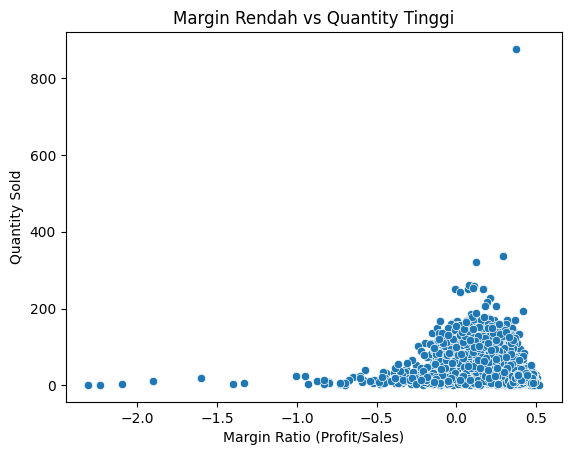

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=product_summary, x='margin_ratio', y='quantity')
plt.title('Margin Rendah vs Quantity Tinggi')
plt.xlabel('Margin Ratio (Profit/Sales)')
plt.ylabel('Quantity Sold')
plt.show()
#banyak produk yang terjual dengan profit rendah

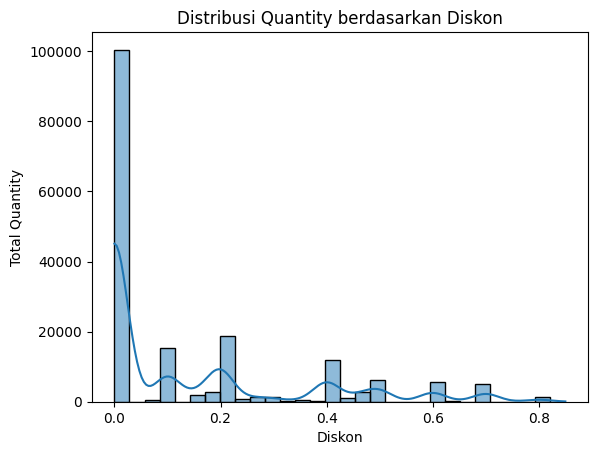

In [ ]:
sns.histplot(data=df, x='discount', weights='quantity', bins=30, kde=True)
plt.title('Distribusi Quantity berdasarkan Diskon')
plt.xlabel('Diskon')
plt.ylabel('Total Quantity')
plt.show()
#Terdapat korelasi negatif lemah antara diskon dan kuantiti, artinya semakin besar diskon, kuantiti cenderung sedikit menurun.

In [17]:
corr = df[['discount', 'profit']].corr().iloc[0, 1]
print(f"Korelasi antara diskon dan profit: {corr:.2f}")

Korelasi antara diskon dan profit: -0.32


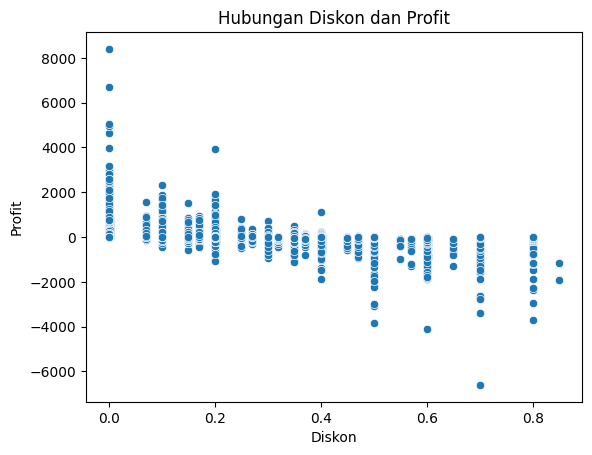

In [ ]:
sns.scatterplot(data=df, x='discount', y='profit')
plt.title('Hubungan Diskon dan Profit')
plt.xlabel('Diskon')
plt.ylabel('Profit')
plt.show()
#"Terdapat korelasi negatif lemah antara diskon dan profit, artinya semakin besar diskon, profit cenderung sedikit menurun."

In [ ]:
corr = df[['discount', 'sales']].corr().iloc[0, 1]
print(f"Korelasi diskon dan penjualan: {corr:.2f}")
#Hasil analisis korelasi diskon dan penjualan mendekati 0 sehingga hubungan keduanya hampir tidak signifikan

Korelasi diskon dan penjualan: -0.09


### Contoh analisis lainnya 

C:\Users\71477\AppData\Local\Temp\ipykernel_27320\893515906.py:9: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df_top5, x='category', y='sales', estimator=sum, ci=None)


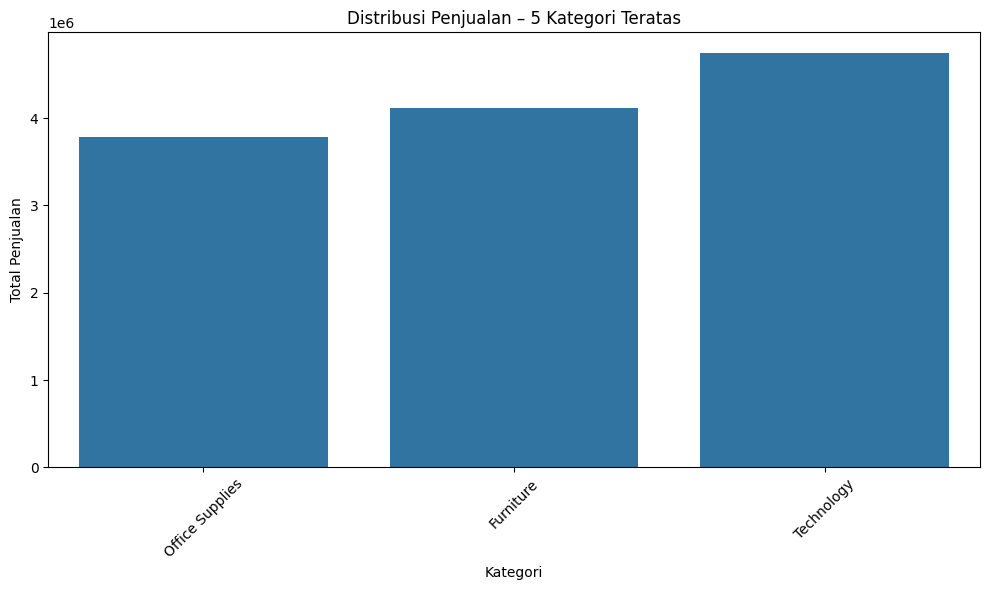

In [21]:
# Hitung total sales per category
top5_category = df.groupby('category')['sales'].sum().nlargest(5).index

# Filter hanya top 5 category
df_top5 = df[df['category'].isin(top5_category)]

# Plot distribusi sales untuk kategori teratas
plt.figure(figsize=(10,6))
sns.barplot(data=df_top5, x='category', y='sales', estimator=sum, ci=None)
plt.title('Distribusi Penjualan – 5 Kategori Teratas')
plt.xlabel('Kategori')
plt.ylabel('Total Penjualan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

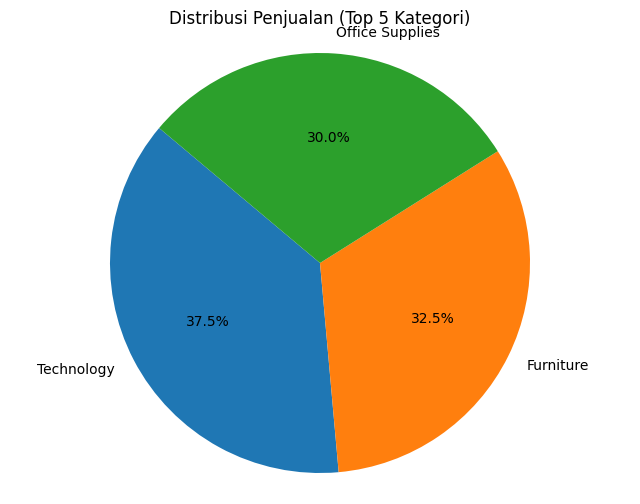

In [23]:
# Hitung total sales per category dan ambil 5 teratas
sales_per_category = df.groupby('category')['sales'].sum()
top5_sales = sales_per_category.nlargest(5)

# Pie chart
plt.figure(figsize=(8, 6))
plt.pie(top5_sales, labels=top5_sales.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribusi Penjualan (Top 5 Kategori)')
plt.axis('equal')  # Membuat lingkaran simetris
plt.show()


C:\Users\71477\AppData\Local\Temp\ipykernel_27320\1737807190.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='segment', y='profit', estimator='mean', ci=None)


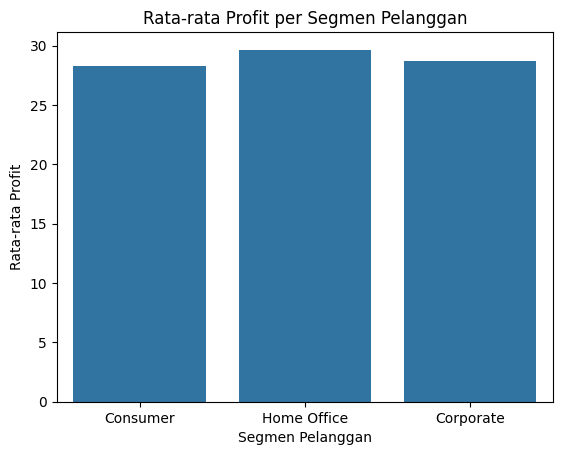

In [ ]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='segment', y='profit', estimator='mean', ci=None)
plt.title('Rata-rata Profit per Segmen Pelanggan')
plt.xlabel('Segmen Pelanggan')
plt.ylabel('Rata-rata Profit')
plt.show()


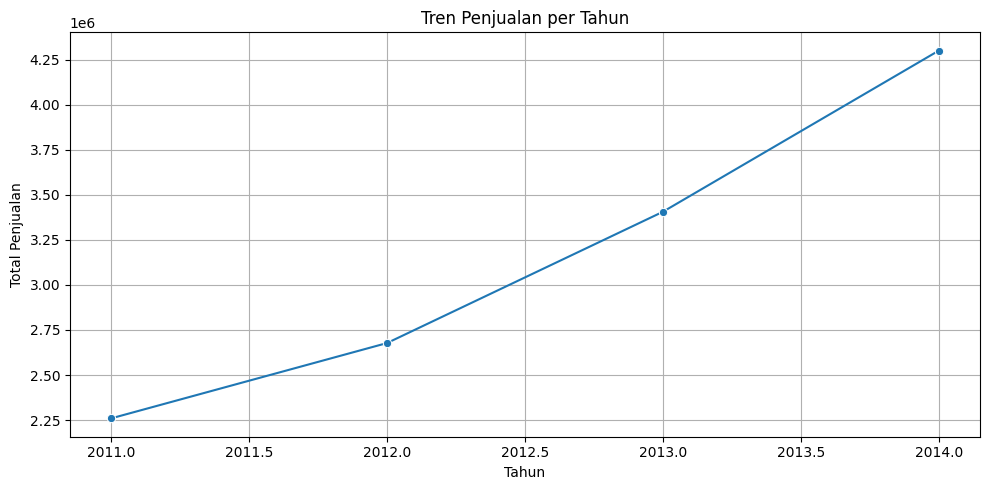

C:\Users\71477\AppData\Local\Temp\ipykernel_27320\901813848.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_countries, x='sales', y='country', palette='viridis')


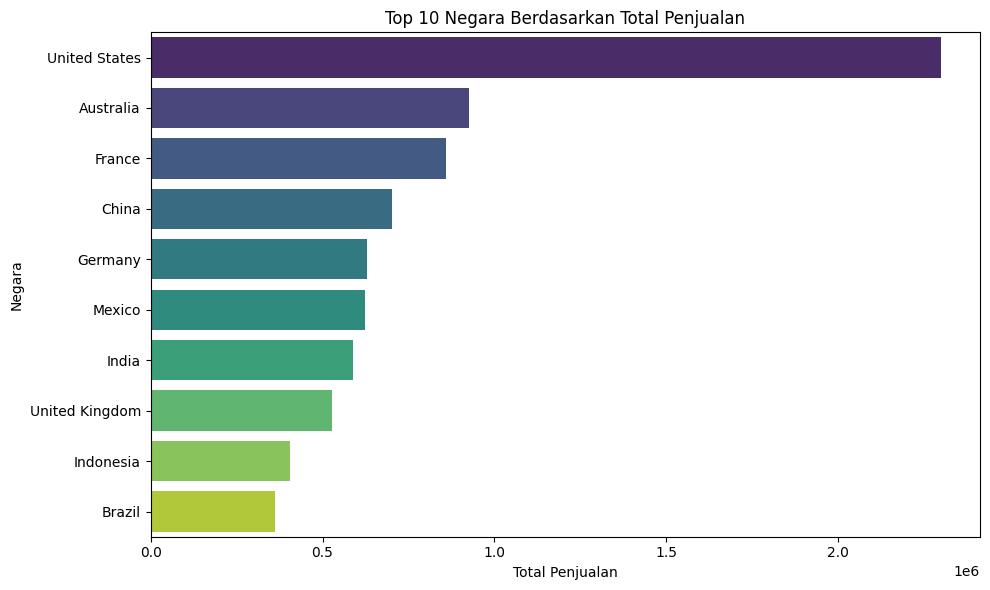

In [29]:
# Pastikan kolom tanggal sudah dalam format datetime
df['order_date'] = pd.to_datetime(df['order_date'])

# Tambahkan kolom tahun
df['year'] = df['order_date'].dt.year

# Agregasi total sales per tahun
sales_per_year = df.groupby('year')['sales'].sum().reset_index()

# Plot tren penjualan per tahun
plt.figure(figsize=(10, 5))
sns.lineplot(data=sales_per_year, x='year', y='sales', marker='o')
plt.title('Tren Penjualan per Tahun')
plt.xlabel('Tahun')
plt.ylabel('Total Penjualan')
plt.grid(True)
plt.tight_layout()
plt.show()

# Kelompokkan dan hitung total sales per negara
top_countries = df.groupby('country')['sales'].sum().sort_values(ascending=False).head(10).reset_index()

# Plot bar chart
plt.figure(figsize=(10,6))
sns.barplot(data=top_countries, x='sales', y='country', palette='viridis')
plt.title('Top 10 Negara Berdasarkan Total Penjualan')
plt.xlabel('Total Penjualan')
plt.ylabel('Negara')
plt.tight_layout()
plt.show()